<a href="https://colab.research.google.com/github/Sharath670/Zomato-Clustering-CP4/blob/main/Zomato_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [287]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats

In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### dataset Loading

In [289]:
# Load dataset
dataset_metadata=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/Zomato Restaurant names and Metadata.csv')
dataset_reviews=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/Zomato Restaurant reviews.csv')

In [290]:
dataset_reviews.rename(columns = {'Restaurant':'Name'}, inplace = True)
dataset_all=pd.merge(dataset_metadata,dataset_reviews,on='Name')

### dataset First View

Reviews data

In [291]:
dataset_reviews.head()

,Name,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [292]:
dataset_reviews.tail()

,Name,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


metadata data

In [293]:
dataset_metadata.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [294]:
dataset_metadata.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


### dataset Rows & Columns count

In [295]:
# dataset_all Rows & Columns count
print( 'The shape is', dataset_all.shape)
print('The number of columns are',len(dataset_all.columns))
print('The number of rows are',len(dataset_all.index))

The shape is (10000, 12)
The number of columns are 12
The number of rows are 10000


### dataset_all Information

In [296]:
# dataset_all Info
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         10000 non-null  object
 1   Links        10000 non-null  object
 2   Cost         10000 non-null  object
 3   Collections  5000 non-null   object
 4   Cuisines     10000 non-null  object
 5   Timings      9900 non-null   object
 6   Reviewer     9962 non-null   object
 7   Review       9955 non-null   object
 8   Rating       9962 non-null   object
 9   Metadata     9962 non-null   object
 10  Time         9962 non-null   object
 11  Pictures     10000 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1015.6+ KB


#### Duplicate Values

In [297]:
# dataset_all Duplicate Value Count
print('The number of duplicated values are',len(dataset_all[dataset_all.duplicated()]))

The number of duplicated values are 36


#### Missing Values/Null Values

In [298]:
# Missing Values/Null Values Count
print('The number of null values are',dataset_all.isnull().sum().sum())

The number of null values are 5297


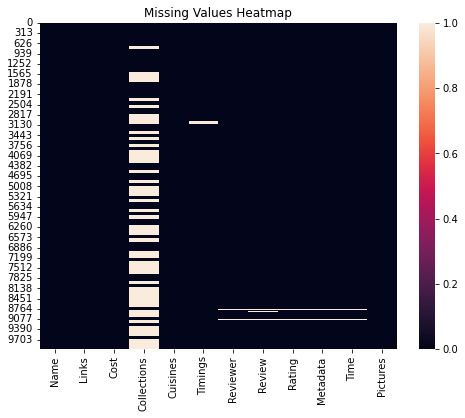

In [299]:
# Visualizing the missing values
plt.figure(figsize=(8, 6)) #size of the figure
sns.heatmap(dataset_all.isnull())
plt.title("Missing Values Heatmap")
plt.show()
     

### What did you know about your dataset_all?

This is a dataset_all that contains details of different restaurants that use zomato. It has 10000 rows and 12 columns. The dataset_all has 36 duplicate values and 5297 null values. 

Initally, I had 2 different dataset, which I then merged on the restaurant name columns to get a single dataset.

## ***2. Understanding Your Variables***

In [300]:
# dataset Columns
dataset_all.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')

In [301]:
# dataset Describe
dataset_all.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,10000,10000,5000,10000,9900,9962,9955,9962,9962,9962,10000.000000
unique,100,100,28,42,89,74,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",12 Noon to 12 Midnight,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,100,1200,400,400,500,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [302]:
# Check Unique Values for each variable.
dataset_all.nunique()

Name            100
Links           100
Cost             28
Collections      42
Cuisines         89
Timings          74
Reviewer       7446
Review         9364
Rating           10
Metadata       2477
Time           9782
Pictures         36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [303]:
# Write your code to make your dataset analysis ready.
df=dataset_all.copy()

In [304]:
# Distribution of different restaurants
df['Name'].value_counts()


Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Name, Length: 100, dtype: int64

In [305]:
#reviewer occurs most amount of times
df['Reviewer'].value_counts().sort_values(ascending=False)[0:10]

Parijat Ray                       13
Ankita                            13
Kiran                             12
Vedant Killa                      11
Jay Mehta                         11
Manojkumar D Nambisan             10
Priyanka                          10
Age Of Foodies (Suraj Karambe)    10
Sravani                           10
Siva Kumar                        10
Name: Reviewer, dtype: int64

In [306]:
df['Rating']=pd.to_numeric(df['Rating'], errors='coerce')
    

In [307]:
# Reviewer that posted most pictures
df.groupby('Reviewer')['Pictures'].sum().sort_values(ascending=False)[0:10]

Reviewer
Food Nawabs                                       157
Vamshi Puli                                        93
Anvith Devulapally                                 83
The Hungry Indians                                 83
Tavleen Kaur Gandhi                                53
Epicurean Tales                                    52
Siva Kumar                                         51
Tasty Hyderabad                                    51
Mohammed Masih Uddin (Hyderabadi Food Therapy)     51
Akshith                                            50
Name: Pictures, dtype: int64

In [308]:
df['Time']=pd.to_datetime(df['Time'])

In [309]:
df['Time of review']=df['Time'].dt.time
df['Hour of review']=df['Time'].dt.hour

In [310]:
#Timing of reviews
df['Time of review'].value_counts().sort_values(ascending=False)[0:10]

22:46:00    28
22:23:00    26
21:49:00    25
22:29:00    24
21:18:00    23
14:27:00    22
22:40:00    22
22:27:00    22
21:11:00    21
22:37:00    21
Name: Time of review, dtype: int64

In [311]:
df['Cost']=df['Cost'].str.replace(',','')

In [312]:
df['Cost']=pd.to_numeric(df['Cost'], errors='coerce')

In [313]:
# Costliest restaurants
df.groupby('Name')['Cost'].mean().sort_values(ascending=False)[0:10]

Name
Collage - Hyatt Hyderabad Gachibowli                 2800.0
Feast - Sheraton Hyderabad Hotel                     2500.0
10 Downing Street                                    1900.0
Jonathan's Kitchen - Holiday Inn Express & Suites    1900.0
Cascade - Radisson Hyderabad Hitec City              1800.0
Zega - Sheraton Hyderabad Hotel                      1750.0
Mazzo - Marriott Executive Apartments                1700.0
B-Dubs                                               1600.0
Arena Eleven                                         1600.0
Barbeque Nation                                      1600.0
Name: Cost, dtype: float64

In [314]:
# Restaurants with highest average rating
df.groupby('Name')['Rating'].mean().sort_values(ascending=False)[0:10]

Name
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Rating, dtype: float64

In [315]:
# Restaurants with lowest average rating
df.groupby('Name')['Rating'].mean().sort_values(ascending=True)[0:10]

Name
Hotel Zara Hi-Fi                         2.400
Asian Meal Box                           2.580
Pakwaan Grand                            2.710
Mathura Vilas                            2.820
Behrouz Biryani                          2.825
Shree Santosh Dhaba Family Restaurant    2.830
The Chocolate Room                       2.830
KFC                                      2.850
Club Rogue                               2.880
Desi Bytes                               2.900
Name: Rating, dtype: float64

In [316]:
# Cheapest restaurants
df.groupby('Name')['Cost'].mean().sort_values(ascending=True)

Name
Amul                                                  150.0
Mohammedia Shawarma                                   150.0
Hunger Maggi Point                                    200.0
KS Bakers                                             200.0
Momos Delight                                         200.0
                                                      ...  
Cascade - Radisson Hyderabad Hitec City              1800.0
Jonathan's Kitchen - Holiday Inn Express & Suites    1900.0
10 Downing Street                                    1900.0
Feast - Sheraton Hyderabad Hotel                     2500.0
Collage - Hyatt Hyderabad Gachibowli                 2800.0
Name: Cost, Length: 100, dtype: float64

In [317]:
# Most common cuisines
df['Cuisines'].str.split(',')

# Flatten the list of cuisines
cuisines = [item.strip() for sublist in df['Cuisines'].str.split(',') for item in sublist]

# Count the number of occurrences of each cuisine
cuisine_counts = pd.Series(cuisines).value_counts()
cuisine_counts[0:10]

North Indian    6000
Chinese         4100
Continental     2100
Biryani         1500
Asian           1400
Italian         1400
Desserts        1300
Fast Food       1300
South Indian     900
Mughlai          600
dtype: int64

### What all manipulations have you done and insights you found?

**Manipulations done:**

I created a copy of my dataset.

Converted the column 'Rating' to numerical.

Changed the column 'Time' to datetime format and created another column called 'Time of review' which contains the exact time in HH:MM:SS format.

I also created a column called 'Hour of Review' by taking the hour from the Time column.

I converted the column 'Cost' into numeric format.


**Insights found:**

1. This dataset has an equal count of all the restaurants, with each restaurant name occuring equal number of times in the dataset.

2. Parijat Ray is the reviewer who has reviewed the most number of times.

3. Food Nawabs have posted 157 pictures, which is higher than all other reviewers.

4. Most of the reviews are uploaded at night time.

5. Collage - Hyatt Hyderabad Gachibowli is the costiest restaurant.

6. Absolute Barbecues has the highest average rating.

7. Hotel Zara has the lowest average rating.

8. Amul is the cheapest restaurant, with an average cost of rupees 150 per person.

9. North Indian Cuisine is the most commonly occuring cuisine in the dataset. 






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar plot of count of restaurants

Text(0.5, 1.0, 'Distribution of Restaurants')

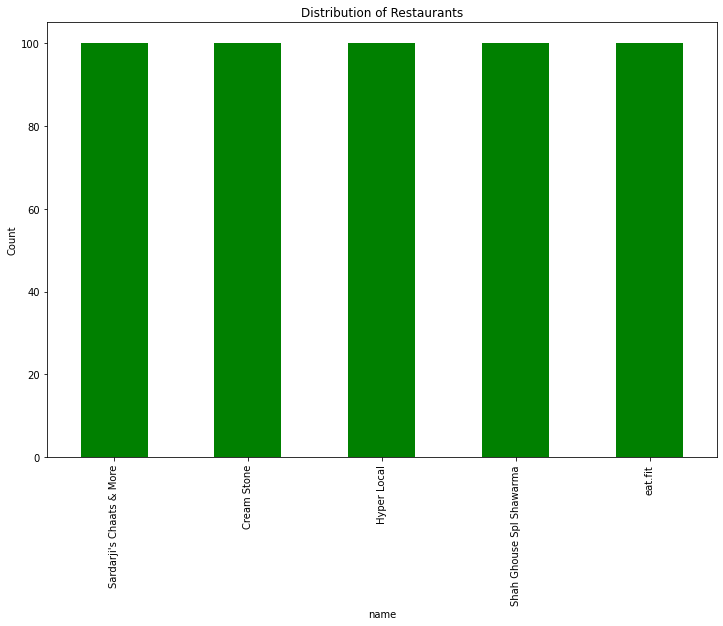

In [318]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 8)) # plot size
df['Name'].value_counts()[65:70].plot.bar(color='green') #plot type
plt.xlabel('name')
plt.ylabel('Count')
plt.title('Distribution of Restaurants')
     

##### 1. Why did you pick the specific chart?

I used a bar chart since it is easy to visualize the counts of categorical variables, where the hight of the rectangular bars are proportional to the amount on the Y axis. It can easily be used to visualize which category has more frequency in the dataset_all.

##### 2. What is/are the insight(s) found from the chart?

From this chart I can see that all the restaurants have equal number of observations in the dataset_all.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this particular plot, I cannot make any business decision, I can only use it to understand how the count of the variables.

#### Chart - 2 - Histogram of Cost

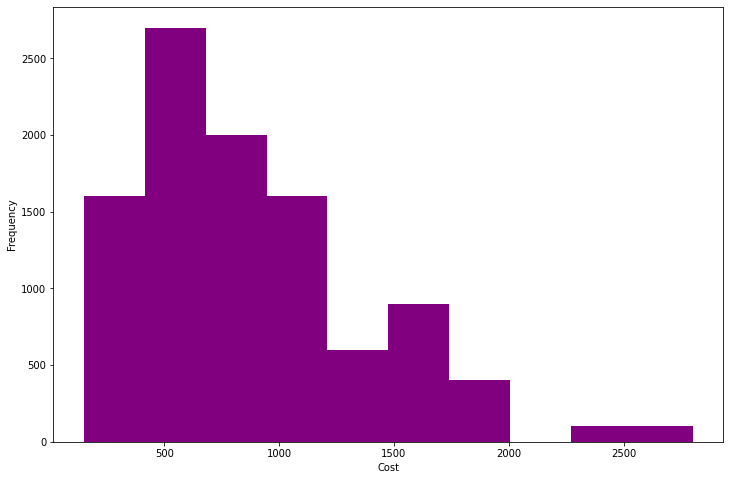

In [319]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 8)) # plot size
plt.hist(df['Cost'],bins=10,color='purple') #plot type
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows us the count of values that lie in different ranges. It is used to represent numerical data and is commonly used for performing univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that a high number of restaurants cost between 500-750  whereas very few restaurant have a cost of 2000+ per person.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is good , since we can see that most restaurants have low priced food. Zomato can also try to bring in costlier restaurants for people willing to spend more monry.

#### Chart - 3 Pie chart of percentage of ratings

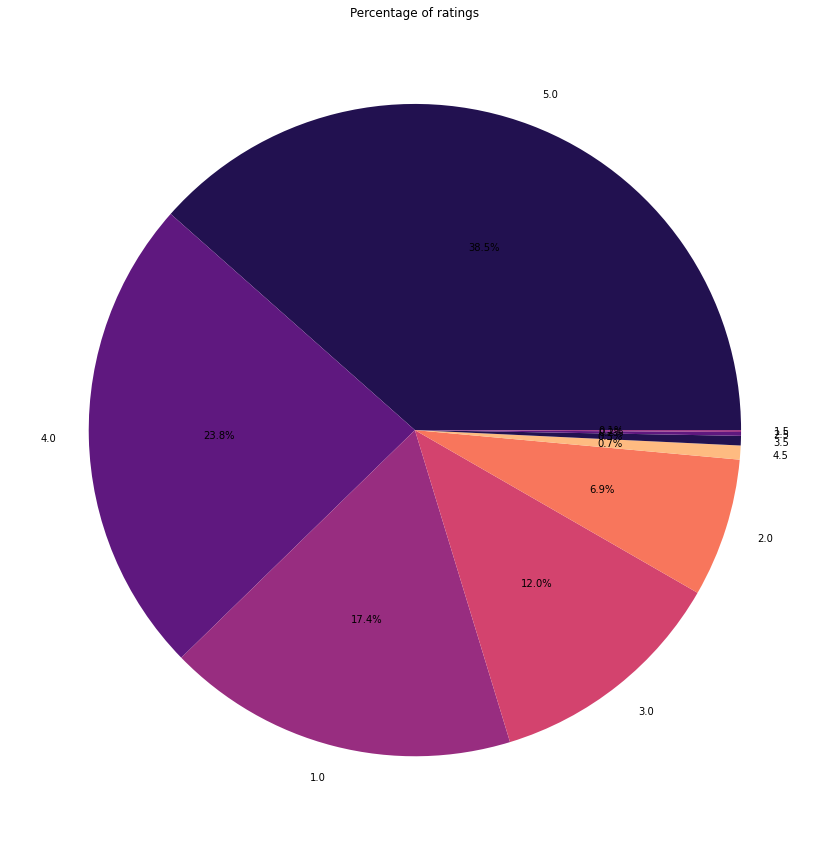

In [320]:
# Chart - 3 visualization code
plt.figure(figsize=(15,15)) #plot size
q=df['Rating'].value_counts()
plt.pie(q.values, labels=q.index, autopct='%1.1f%%') #plot type
plt.title('Percentage of ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage distrbution of the ratings given.

A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that 5 star rating is given more frequently(38.5) compared to other ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is good for zomato, since we can see that people are mostly happy and satisfied with the restaurants, with 4 and 5 stars making up most of the ratings.

#### Chart - 4  Scatterplot of rating vs pictures

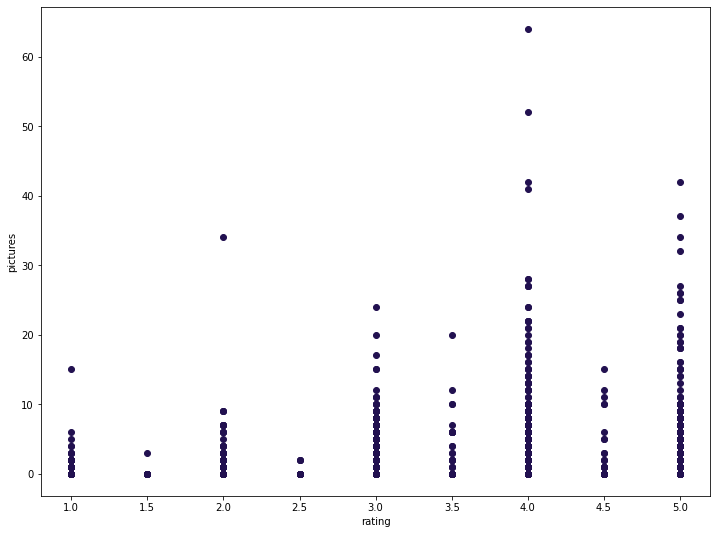

In [321]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 9)) #plot size
plt.scatter(df['Rating'],df['Pictures']) #plot type
plt.xlabel('rating')
plt.ylabel('pictures')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot which is commonly used to represent bivariate data.Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that people prefer to take pictures mostly when they give higher ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this chart, we can see that, when people are not satisfied with the restaurant, they do not take pictures either.

Zomato should encourage them to take pictures of the food of the restaurant when they are not satisfied, since it helps zomato understand their grievance better.

#### Chart - 5 - WordCloud of Cuisines

In [322]:
from wordcloud import WordCloud

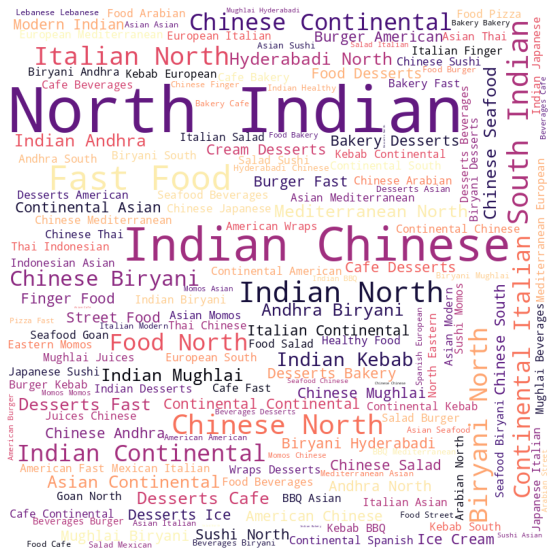

In [323]:
words_string = " ".join(cuisines)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white',colormap='magma').generate(words_string)

# Display the generated image
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

I used a wordcloud to visualize the cuisines. Word clouds are used as a visual representation of text data, where the size of each word represents its frequency or importance in the text. They are often used to quickly identify the most frequently occurring words or themes in a given text or corpus.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can clearly see that North Indian food has the highest frequency followed by Indian Chinese.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can use this data to see which cuisines are the most common among the restaurants that use their app. They can also try and include more restaurants which serve uncommon cuisines to try and diversify their business.

#### Chart - 6 Bar Plot of Costliest Restaurants

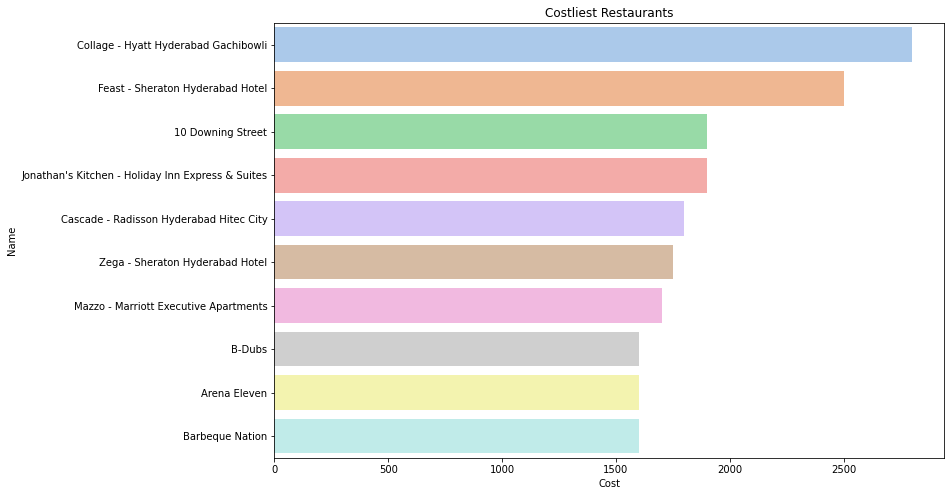

In [324]:
# Chart - 6 visualization code
plt.figure(figsize=(12,8))
q=df.groupby('Name')['Cost'].mean().sort_values(ascending=False).reset_index()[0:10]
sns.set_palette("pastel")
sns.barplot(x =q['Cost'], y=q['Name']) # plot type
plt.title('Costliest Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the opposite axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can clearly see that Collage restaurant is the costliest, followed by Feast and 10 downing street, with the costliest restaurant having a cost per person of Rs. 2500+.

#### Chart - 7 - Bar Plot of Cheapest Restaurants

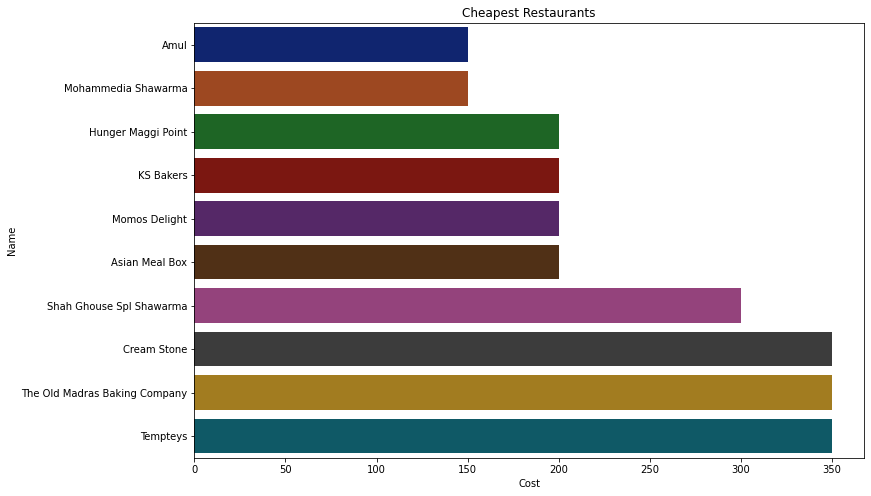

In [325]:
# Chart - 7 visualization code
plt.figure(figsize=(12,8))
q=df.groupby('Name')['Cost'].mean().sort_values(ascending=True).reset_index()[0:10]
sns.set_palette("dark")
sns.barplot(x =q['Cost'], y=q['Name']) # plot type
plt.title('Cheapest Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the opposite axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that Amul is the cheapest, followed by Mohammedia Shawarma.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can use this insight to see which restaurants are cost effective.

#### Chart - 8 - Pie chart of Hour of review

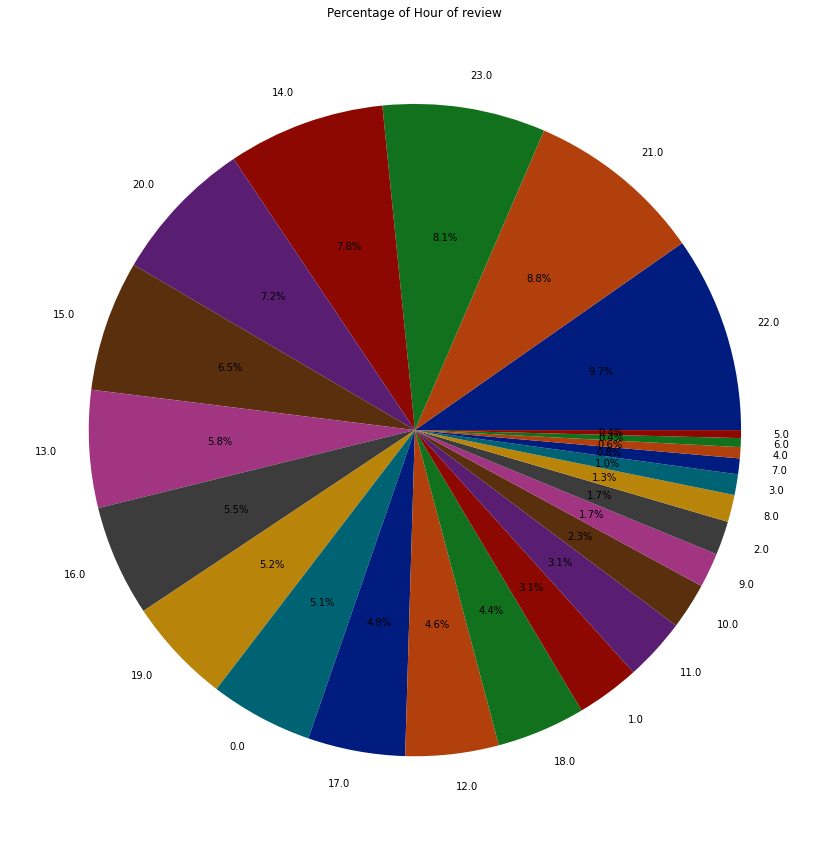

In [326]:
# Chart - 8 visualization code
plt.figure(figsize=(15,15)) #plot size
q=df['Hour of review'].value_counts()
plt.pie(q.values, labels=q.index, autopct='%1.1f%%') #plot type
plt.title('Percentage of Hour of review')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage distribution of the hour in which reviewers posted their reviews. 
A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

I can see that most people prefer to write reviews at 10pm, and very few people upload reviews at 5am. 

#### Chart - 9 - WordCloud of collections

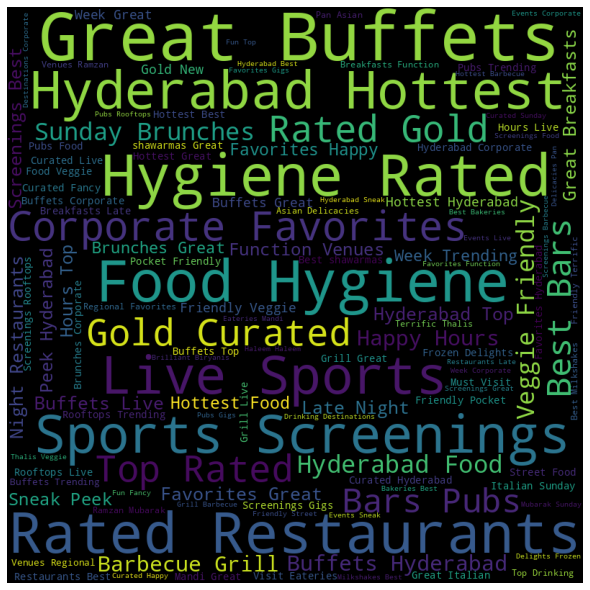

In [327]:
# Chart - 9 visualization code
collections_text = ' '.join(df['Collections'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(collections_text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Show the plot
plt.show()







##### 1. Why did you pick the specific chart?

I used a wordcloud to visualize the collection in which the restaurants belong to. Word clouds are used as a visual representation of text data, where the size of each word represents its frequency or importance in the text. They are often used to quickly identify the most frequently occurring words or themes in a given text or corpus.

##### 2. What is/are the insight(s) found from the chart?

I can see that Sports Screenings, Great Buffets, and Hyderabad Hottest are some of the most common tags given to restaurants.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato  and restaurant owners can use this information to see which tags are most important to people which affects their decision to choose a particular restaurant.

#### Chart - 10 - Donut Chart of top 10 reviewers by picture count

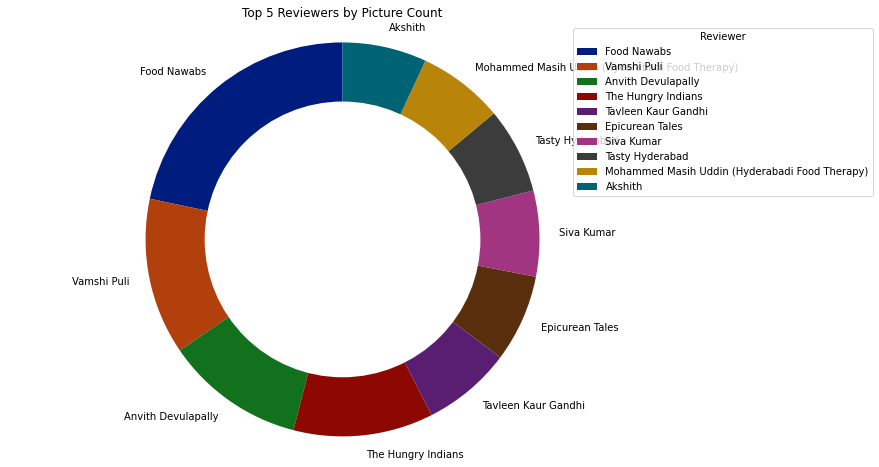

In [328]:
# Chart - 10 visualization code
reviewer_pics=df.groupby('Reviewer')['Pictures'].sum().sort_values(ascending=False).reset_index()[0:10]
reviewer_pics
plt.figure(figsize=(12,8))
plt.pie(reviewer_pics['Pictures'], labels=reviewer_pics['Reviewer'], startangle=90)
plt.axis('equal')
plt.title('Top 5 Reviewers by Picture Count')
plt.legend(title='Reviewer', loc='upper right', bbox_to_anchor=(1.3, 1))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

A Donut chart is essentially a Pie Chart with an area of the center cut out. I have used it to visualize the top 10 reviewers based on the amount of pictures taken.

##### 2. What is/are the insight(s) found from the chart?

I can see that Food Nawabs have taken the most amount of pictures followed by Vamshi Puli.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Restaurants should encourage their customers to take pictures of the restaurant when they visit, to increase their popularity and and visibility, and also incentivize customers to do so.

#### Chart - 11 - Barplot of the restaurants with lowest rating.

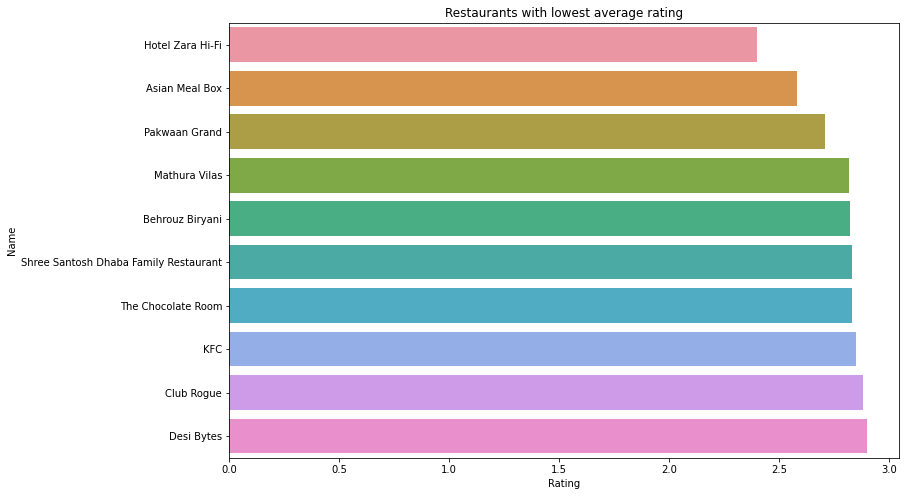

In [329]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8))
q=df.groupby('Name')['Rating'].mean().sort_values(ascending=True).reset_index()[0:10]
sns.set_palette("magma")
sns.barplot(x =q['Rating'], y=q['Name']) # plot type
plt.title('Restaurants with lowest average rating')
plt.show()


##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the opposite axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the worst rated restaurant is Hotel Zara Hi-fi, with an average rating of just 2.5.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato should find the reason as to why these particular restaurants are having low ratings, since it is bad for the company to partner with restaurants that are not up to the mark.

#### Chart - 12 - Correlation Heatmap

<AxesSubplot:>

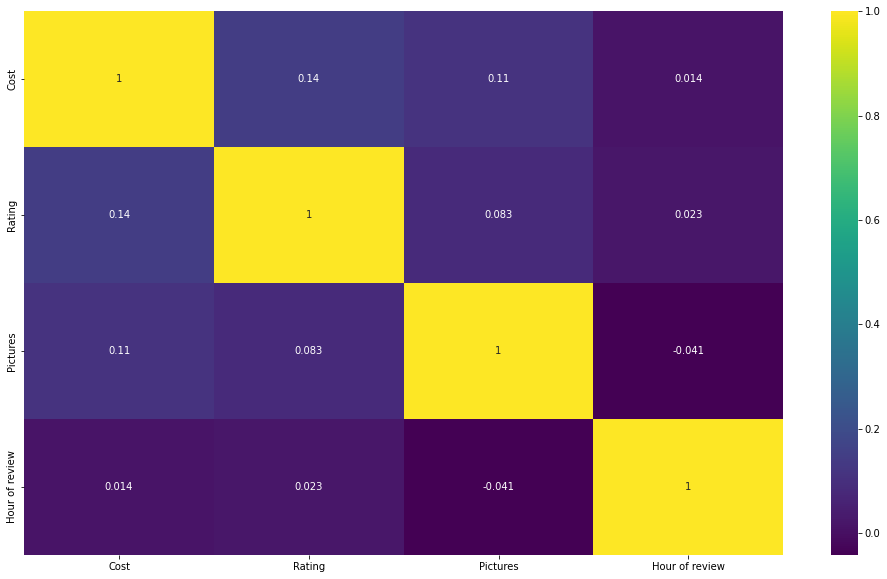

In [330]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10)) #plot size
sns.heatmap(df.corr(),annot=True,cmap='viridis') #plot type


##### 1. Why did you pick the specific chart?

I used a correlation heatmap to visualize the correlations between the variables and to find out if there are any significant positive or negative relationships between variables.



##### 2. What is/are the insight(s) found from the chart?

From the chart, it is clear that there are no significant relationships between the numerical columns in the dataset_all.

#### Chart - 13 - Pair Plot 

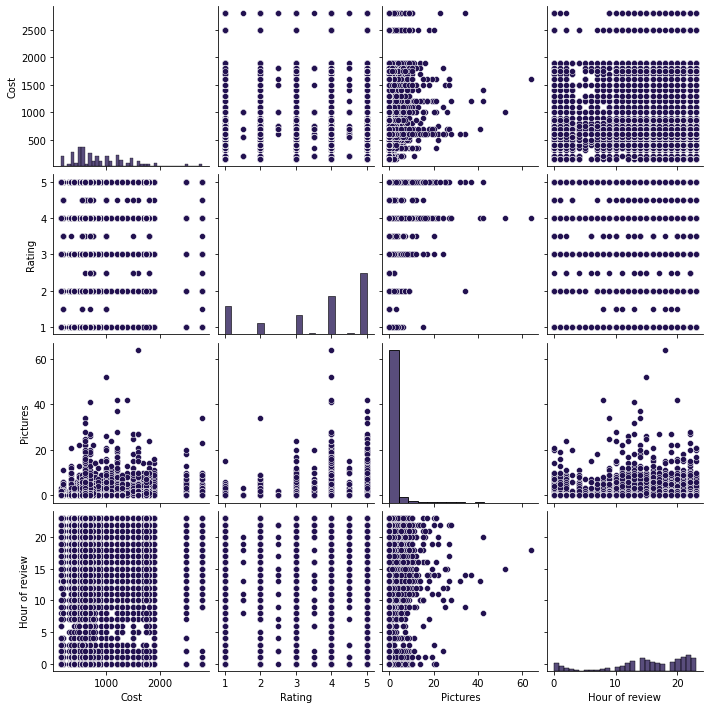

In [331]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pairplot shows you multiple bivariate distributions. It basically shows us the graphs of each bivariate distributions unlike a correlation heatmap which shows us only the values. We can look at each of these plots to check if there are any correlations.

##### 2. What is/are the insight(s) found from the chart?

The insights from this chart are pretty much similar to the insights obtained using the correlation heatmap. There are no significant correlations among the variables in the dataset_all.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset_all. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average number of pictures taken is 3.
2. The average restaurant rating is 4
3. The average cost of restaurants is 1000

### Hypothetical Statement - 1

The average number of pictures taken is 3. 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=3

Alternate Hypothesis: mean !=3

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [332]:
# Perform Statistical Test to obtain P-Value
x_bar = df['Pictures'].mean() #mean
mu = 3
population_sd= df['Pictures'].std()
n=len(df['Pictures'][0:30])

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value

4.4524569386972246e-05

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have rejected the null hypothesis as the p value is less than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of Pictures is significantly different from a known population mean.

### Hypothetical Statement - 2

The average restaurant rating is 4

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=4

Alternate Hypothesis: mean !=4

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [333]:
# Perform Statistical Test to obtain P-Value
x_bar = df['Rating'].mean() #mean
mu =4
population_sd= df['Rating'].std()
n=len(df['Rating'][:30])

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value

0.15151687471234854

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have failed to reject the null hypothesis as the p value is more than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of Rating is significantly different from a known population mean.

### Hypothetical Statement - 3

The average cost of restaurants is 1000

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=1000

Alternate Hypothesis: mean !=1000

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [334]:
# Perform Statistical Test to obtain P-Value
x_bar = df['Cost'].mean() #mean
mu =1000
population_sd= df['Cost'].std()
n=len(df['Cost'][:30])

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value

0.17432169764510408

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have failed to reject the null hypothesis as the p value is more than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of cost is significantly different from a known population mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

For reviews dataset

In [335]:
df_reviews=dataset_reviews.copy()

In [336]:
df_reviews['Rating'] = pd.to_numeric(df_reviews['Rating'], errors='coerce')

In [337]:
# Handling Missing Values & Missing Value Imputation
df_reviews.isnull().sum().sum()

198

In [338]:
df_reviews.isnull().sum()

Name         0
Reviewer    38
Review      45
Rating      39
Metadata    38
Time        38
Pictures     0
dtype: int64

In [339]:
len(df_reviews[df_reviews.duplicated()])



36

In [340]:
# dropping the duplicate rows
df_reviews = df_reviews.drop_duplicates()

In [341]:
len(df_reviews[df_reviews.duplicated()])

0

In [342]:
# Since there are only a few na values, dropping them
df_reviews = df_reviews.dropna()

In [343]:
df_reviews.isnull().sum()

Name        0
Reviewer    0
Review      0
Rating      0
Metadata    0
Time        0
Pictures    0
dtype: int64

In [344]:
df_reviews.shape

(9954, 7)

Now there are no missing or duplicated values in the reviews dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

For reviews dataset:

There were a few duplicated and a few null values, I dropped those rows since there were not too many, so dropping them won't make much of an impact on the dataset.

### 2. Handling Outliers

For reviews column.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

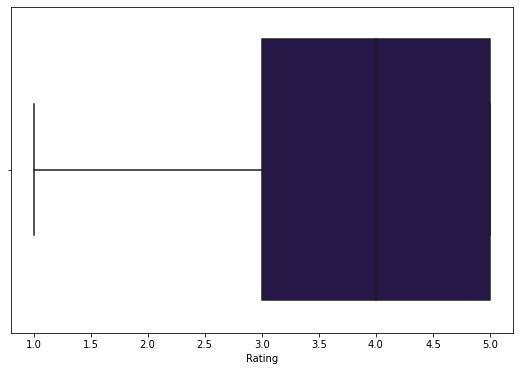

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

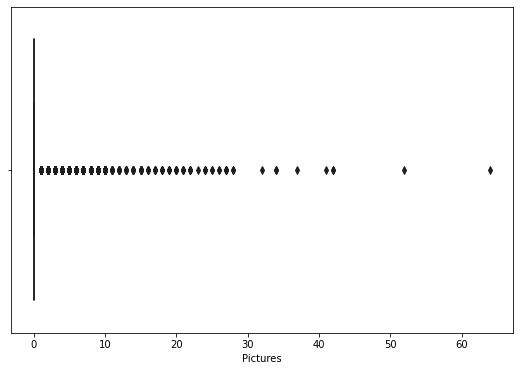

In [345]:
# Handling Outliers & Outlier treatments
numerical=df_reviews.describe().columns.values
for i in numerical:
  plt.figure() # plots figure for each iteration
  plt.figure(figsize=(9,6))  
  sns.boxplot(df[i]) #plot type
  plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Reviews dataset:

I did not have to use any outlier treatment techniques due to the nature of the numerical feature.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset_all i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [346]:
# Taking only necessary columns
sent_df=df_reviews[['Review','Rating']]



In [347]:
# performing contraction
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [348]:
import contractions

In [349]:
def expand_contractions(text):
    return contractions.fix(text)

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(expand_contractions)

<ipython-input-349-a65a2c01c5e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(expand_contractions)


#### 2. Lower Casing

In [350]:
# Lower Casing
sent_df['Review'] = sent_df['Review'].str.lower()

<ipython-input-350-30a99c3fee12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].str.lower()


#### 3. Removing Punctuations

In [351]:
# Remove Punctuations
import string
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(remove_punctuations)

<ipython-input-351-337feb4bb53a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(remove_punctuations)


#### 4. Removing URLs & Removing words and digits contain digits.

In [352]:
# Remove URLs & Remove words and digits contain digits
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(remove_urls)


<ipython-input-352-77400ed80342>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(remove_urls)


In [353]:
# Removing digits
remove_digits = lambda x: ''.join([i for i in x if not i.isdigit()])

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(remove_digits)


<ipython-input-353-feddb28ad58e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(remove_digits)


#### 5. Removing Stopwords & Removing White spaces

In [354]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [355]:
def remove_stopwords(text):
    """
    This function removes stopwords from a given text.
    """
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

sent_df['Review']=sent_df['Review'].apply(remove_stopwords)


<ipython-input-355-e4a5876cc521>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review']=sent_df['Review'].apply(remove_stopwords)


In [356]:
# Remove White spaces
sent_df['Review'] = sent_df['Review'].str.strip()

<ipython-input-356-0e1d06540607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].str.strip()


#### 6. Rephrase Text

In [357]:
# Rephrase Text


#### 7. Tokenization

In [358]:
# Tokenization
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [359]:
def tokenize_text(text):
    """
    This function tokenizes a given text into words.
    """
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply function to the column
sent_df['Review'] = sent_df['Review'].apply(tokenize_text)


<ipython-input-359-ff5c66639918>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(tokenize_text)


#### 8. Text Normalization

In [360]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [361]:
def lemmatize_text(tokens):
    """
    This function lemmatizes a given text by reducing each word to its root form.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Apply function to the column
sent_df['Review'] = sent_df['Review'].apply(lemmatize_text)

<ipython-input-361-525055d50903>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(lemmatize_text)


In [362]:
sent_df

,Review,Rating
0,ambience good food quite good saturday lunch c...,5.0
1,ambience good pleasant evening service prompt ...,5.0
2,must try great food great ambience thnx servic...,5.0
3,soumen da arun great guy behavior sincerety go...,5.0
4,food goodwe ordered kodi drumstick basket mutt...,5.0
...,...,...
9995,madhumathi mahajan well start nice courteous s...,3.0
9996,place never disappointed u food courteous staf...,4.5
9997,bad rating mainly chicken bone found veg food ...,1.5
9998,personally love prefer chinese food couple tim...,4.0


##### Which text normalization technique have you used and why?

I used lemmatization to perform normalization. Lemmatization is the process of reducing words to their base form or lemma, by taking into account the context and part of speech of the word. For example, the lemma of "ran" is "run". 

The reason I chose lemmatization is because it can produce more accurate results than stemming.

#### 9. Part of speech tagging

In [363]:
# POS Taging


#### 10. Text Vectorization

In [364]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( lowercase=True, stop_words='english')

X = vectorizer.fit_transform(sent_df['Review'])


##### Which text vectorization technique have you used and why?

I used TF-IDF vectorizer. TF-IDF vectorizer takes into account the importance of each token in the corpus. It does this by calculating a score for each token that reflects how often it appears in a document (TF) and how rare it is in the corpus (IDF). The TF-IDF score is higher for tokens that appear frequently in a document but rarely in the corpus, and lower for tokens that are common in both the document and the corpus.

I chose it over CountVectorizes because it takes into account the importance of each token in the corpus and provides a more informative representation of the text data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

For review dataset

In [365]:
# Manipulate Features to minimize feature correlation and create new features
sent_df['Sentiment']=sent_df['Rating'].apply(lambda x: 1 if x >= 3.5 else 0)




<ipython-input-365-5ca6dbc3fd35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Sentiment']=sent_df['Rating'].apply(lambda x: 1 if x >= 3.5 else 0)


In [368]:
sent_df.drop('Rating',axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 2. Feature Selection

For review dataset

In [371]:
# Select your features wisely to avoid overfitting
y=sent_df['Sentiment']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [259]:
# Transform Your data

### 6. Data Scaling

In [260]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [261]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset_all.)

Answer Here.

### 8. Data Splitting

In [372]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)


##### What data splitting ratio have you used and why? 

The ratio I have used is 80:20. Which means that 80% of the data is used for training and 20% of the data is used for testing. This is the most commonly used ratio for splitting the data. There does not seem to be a clear rule on what ratio is best or optimal for a given dataset, but using an 80:20 split is said to be a good bet.

### 9. Handling Imbalanced dataset

##### Do you think the dataset all is imbalanced? Explain Why.

No, the dataset is not imbalanced.

In [373]:
# Handling Imbalanced dataset_all (If needed)
Y.value_counts()

1    6315
0    3639
Name: Sentiment, dtype: int64

##### What technique did you use to handle the imbalance dataset_all and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Naive bayes

In [376]:
# ML Model - 1 Implementation
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

# Fit the Algorithm
clf = MultinomialNB()
clf.fit(X_train, y_train)
# Predict on the model
y_prednb=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       743
           1       0.78      0.98      0.87      1248

    accuracy                           0.82      1991
   macro avg       0.87      0.76      0.78      1991
weighted avg       0.85      0.82      0.80      1991



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [378]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_prednb))


              precision    recall  f1-score   support

           0       0.95      0.54      0.69       743
           1       0.78      0.98      0.87      1248

    accuracy                           0.82      1991
   macro avg       0.87      0.76      0.78      1991
weighted avg       0.85      0.82      0.80      1991



#### 2. Cross- Validation & Hyperparameter Tuning

In [381]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}
# Fit the Algorithm
grid_search = GridSearchCV(clf, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)
# Predict on the model
y_prednbcv = grid_search.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [382]:
print(classification_report(y_test, y_prednbcv))


              precision    recall  f1-score   support

           0       0.84      0.71      0.77       743
           1       0.84      0.92      0.88      1248

    accuracy                           0.84      1991
   macro avg       0.84      0.82      0.83      1991
weighted avg       0.84      0.84      0.84      1991



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [267]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [268]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [269]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [270]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [271]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [272]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [273]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***